# Linear Regression

## Linear Regression Basics

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')


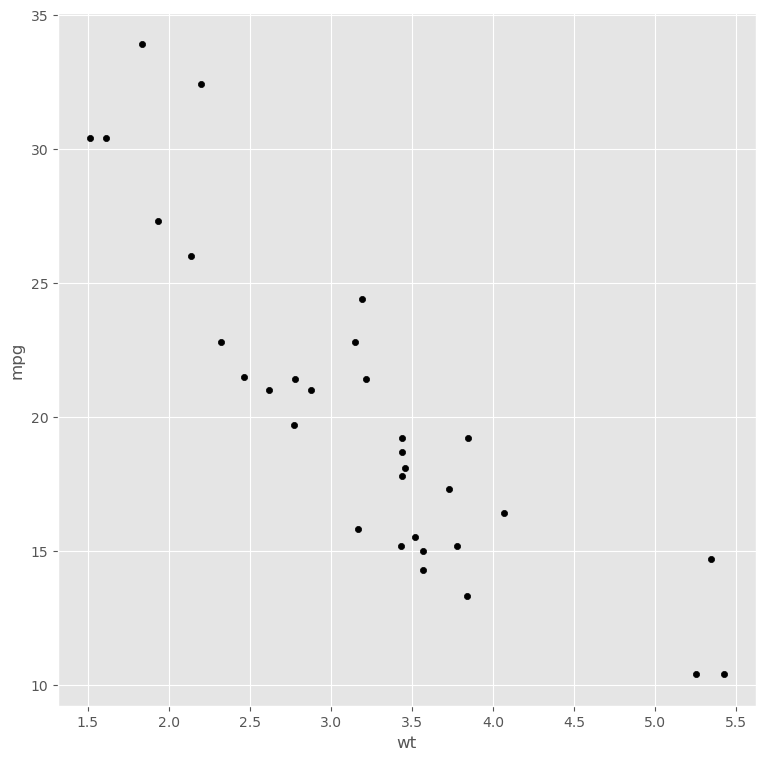

In [5]:
# Load mtcars data set
mtcars = pd.read_csv("mtcars.csv")

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black");

In [3]:
from sklearn import linear_model

In [6]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(mtcars["wt"]), 
                     y = mtcars["mpg"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

37.28512616734204
[-5.34447157]


In [7]:
regression_model.score(X = pd.DataFrame(mtcars["wt"]), 
                       y = mtcars["mpg"])

0.7528327936582646

In [8]:
train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))

# Actual - prediction = residuals
residuals = mtcars["mpg"] - train_prediction

residuals.describe()

count    3.200000e+01
mean    -4.996004e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

In [9]:
SSResiduals = (residuals**2).sum()

SSTotal = ((mtcars["mpg"] - mtcars["mpg"].mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)

0.7528327936582646

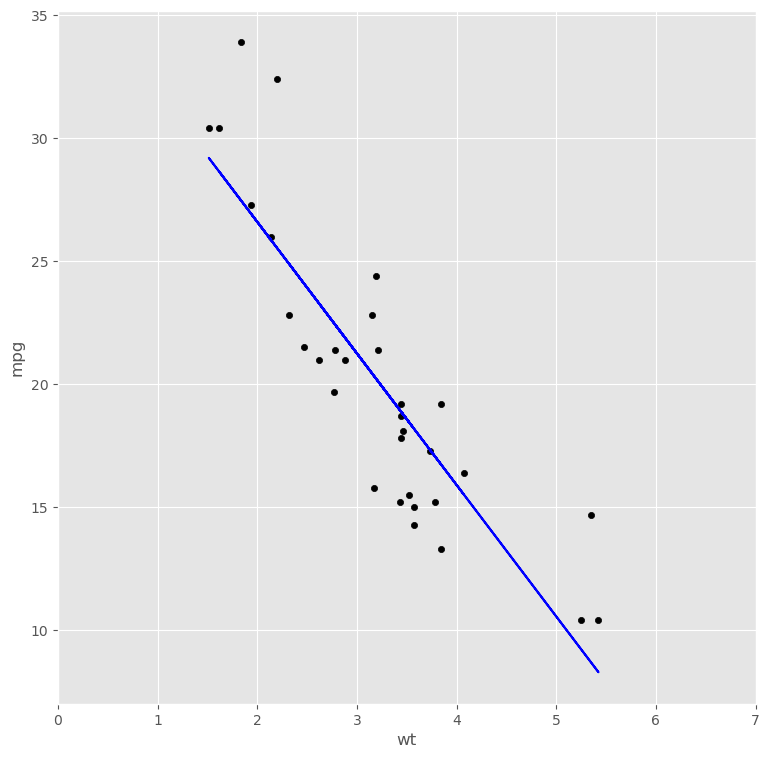

In [10]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot regression line
plt.plot(mtcars["wt"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue");

C:\Users\HP\AppData\Local\Temp\ipykernel_12244\1753579302.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_cars = mtcars_subset.append(super_car)


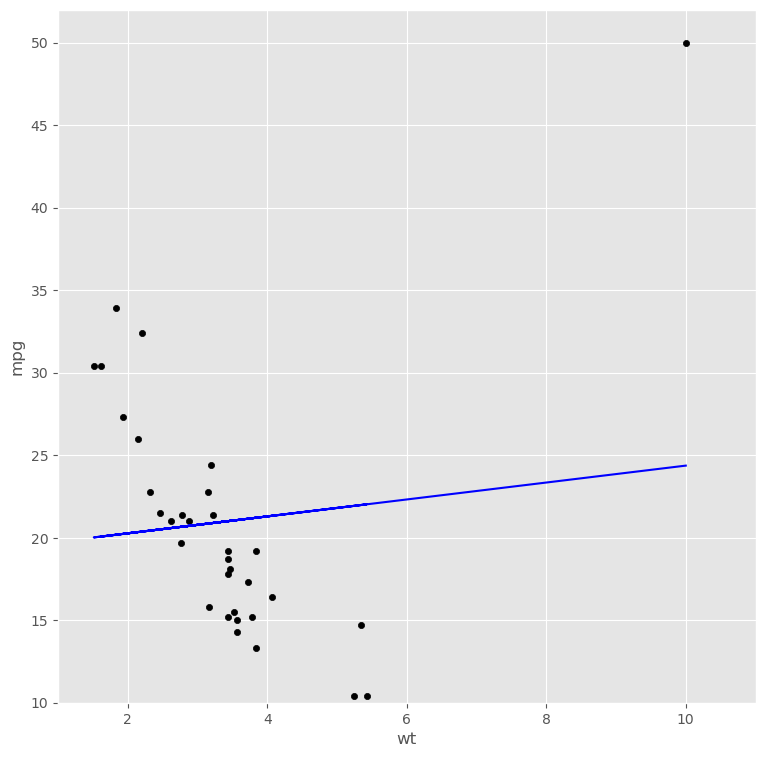

In [11]:
mtcars_subset = mtcars[["mpg","wt"]]

super_car = pd.DataFrame({"mpg":50,"wt":10}, index=["super"])

new_cars = mtcars_subset.append(super_car)

# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the new_cars data
regression_model.fit(X = pd.DataFrame(new_cars["wt"]), 
                     y = new_cars["mpg"])

train_prediction2 = regression_model.predict(X = pd.DataFrame(new_cars["wt"]))

# Plot the new model
new_cars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black", xlim=(1,11), ylim=(10,52))

# Plot regression line
plt.plot(new_cars["wt"],     # Explanatory variable
         train_prediction2,  # Predicted values
         color="blue");

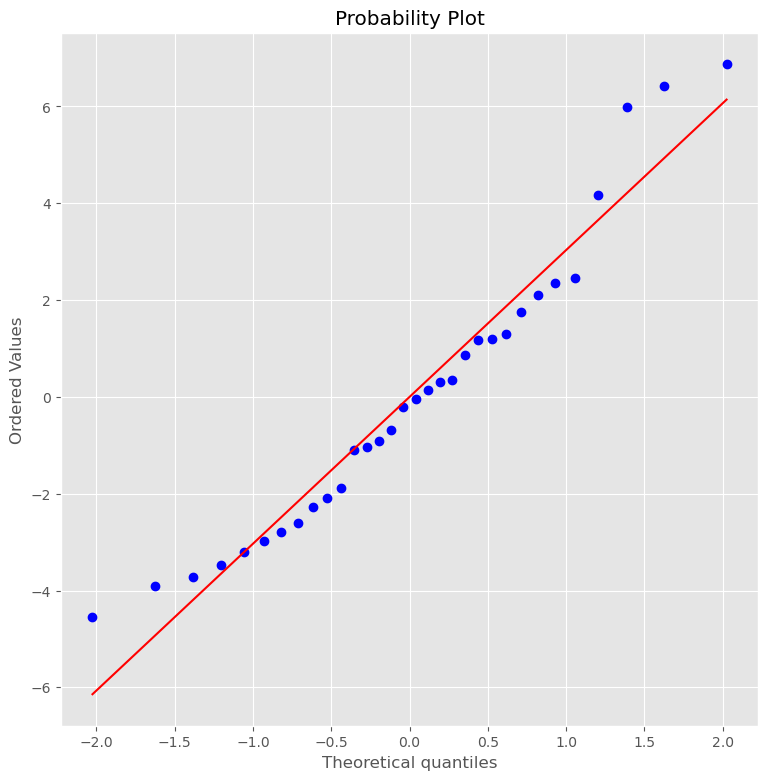

In [12]:
plt.figure(figsize=(9,9))

stats.probplot(residuals, dist="norm", plot=plt);

In [ ]:
def rmse(predicted, targets):
    """
    Computes root mean squared error of two numpy ndarrays
    
    Args:
        predicted: an ndarray of predictions
        targets: an ndarray of target values
    
    Returns:
        The root mean squared error as a float
    """
    return (np.sqrt(np.mean((targets-predicted)**2)))

rmse(train_prediction, mtcars["mpg"])


In [13]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction, mtcars["mpg"])**0.5

RMSE

2.949162685955028

## Polynomial Regression

In [14]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([mtcars["wt"],           # Include weight
                           mtcars["wt"]**2]).T     # Include weight squared

# Train the model using the new_cars data
poly_model.fit(X = predictors, 
               y = mtcars["mpg"])

# Check trained model y-intercept
print("Model intercept")
print(poly_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients")
print(poly_model.coef_)

# Check R-squared
print("Model Accuracy:")
print(poly_model.score(X = predictors, 
                 y = mtcars["mpg"]))

Model intercept
49.93081094945178
Model Coefficients
[-13.38033708   1.17108689]
Model Accuracy:
0.8190613581384095


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


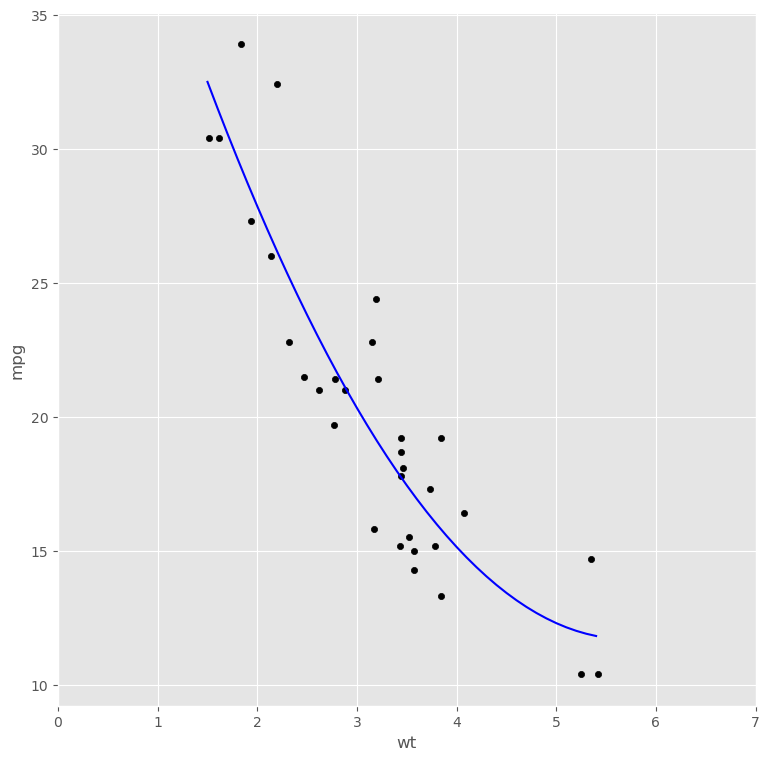

In [15]:
# Plot the curve from 1.5 to 5.5
poly_line_range = np.arange(1.5, 5.5, 0.1)

# Get first and second order predictors from range
poly_predictors = pd.DataFrame([poly_line_range,
                               poly_line_range**2]).T

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot curve line
plt.plot(poly_line_range,   # X-axis range
         y_values,          # Predicted values
         color="blue");

In [16]:
preds = poly_model.predict(X=predictors)

rmse(preds , mtcars["mpg"])

NameError: name 'rmse' is not defined

In [17]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([mtcars["wt"],           
                           mtcars["wt"]**2,
                           mtcars["wt"]**3,
                           mtcars["wt"]**4,
                           mtcars["wt"]**5,
                           mtcars["wt"]**6,
                           mtcars["wt"]**7,
                           mtcars["wt"]**8,
                           mtcars["wt"]**9,
                           mtcars["wt"]**10]).T     

# Train the model using the new_cars data
poly_model.fit(X = predictors, 
               y = mtcars["mpg"])

# Check trained model y-intercept
print("Model intercept")
print(poly_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients")
print(poly_model.coef_)

# Check R-squared
poly_model.score(X = predictors, 
                 y = mtcars["mpg"])

Model intercept
-14921.120127964019
Model Coefficients
[ 6.45813551e+04 -1.20086129e+05  1.26931926e+05 -8.46598441e+04
  3.73155193e+04 -1.10334754e+04  2.16590402e+03 -2.70730542e+02
  1.94974160e+01 -6.15515431e-01]


0.8702106584850604

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


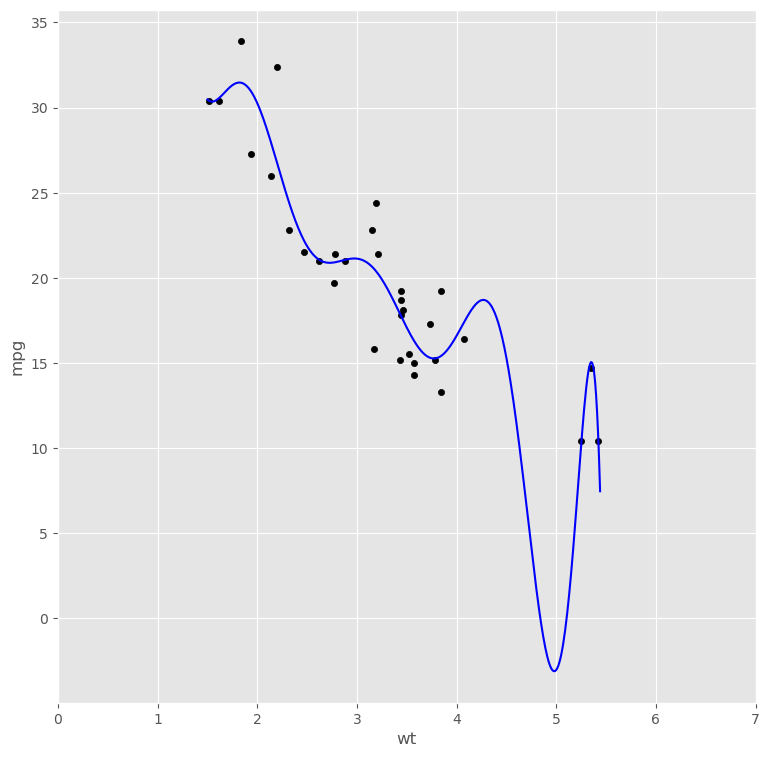

In [18]:
p_range = np.arange(1.5, 5.45, 0.01)

poly_predictors = pd.DataFrame([p_range, p_range**2, p_range**3,
                              p_range**4, p_range**5, p_range**6, p_range**7, 
                              p_range**8, p_range**9, p_range**10]).T  

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot curve line
plt.plot(p_range,   # X-axis range
         y_values,          # Predicted values
         color="blue");

## Multiple Linear Regression

In [19]:
# Initialize model
multi_reg_model = linear_model.LinearRegression()

# Train the model using the mtcars data
multi_reg_model.fit(X = mtcars.loc[:,["wt","hp"]], 
                     y = mtcars["mpg"])

# Check trained model y-intercept
print(multi_reg_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print(multi_reg_model.coef_)

# Check R-squared
multi_reg_model.score(X = mtcars.loc[:,["wt","hp"]], 
                      y = mtcars["mpg"])

37.227270116447215
[-3.87783074 -0.03177295]


0.8267854518827914

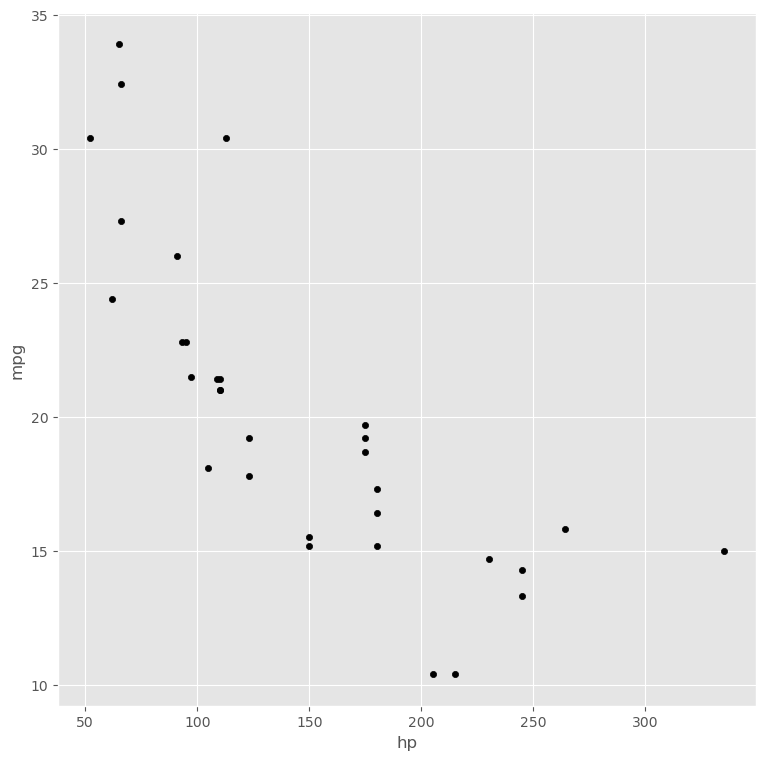

In [20]:
mtcars.plot(kind="scatter",
           x="hp",
           y="mpg",
           figsize=(9,9),
           color="black");

In [23]:
# Initialize model
multi_reg_model = linear_model.LinearRegression()

# Include squared terms
poly_predictors = pd.DataFrame([mtcars["wt"],
                                mtcars["hp"],
                                mtcars["wt"]**2,
                                mtcars["hp"]**2]).T

# Train the model using the mtcars data
multi_reg_model.fit(X = poly_predictors, 
                    y = mtcars["mpg"])

# Check R-squared
print("R-Squared")
print( multi_reg_model.score(X = poly_predictors , 
                      y = mtcars["mpg"]) )

# Check RMSE
print("RMSE")
print(RMSE(multi_reg_model.predict(poly_predictors),mtcars["mpg"]))

R-Squared
0.8907279549670641
RMSE


TypeError: 'numpy.float64' object is not callable